## Learning project for Python Data Science using pandas library and matplotlib to analyze and visualize data collected from 3 data sets; Movies, Ratings, and Users data sets

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

## 1) Read the file data

In [2]:
movies_df = pd.read_csv(
    'D:\\dataset\\movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    engine='python',
    header=None
)
users_df = pd.read_csv(
    'D:\\dataset\\users.dat',
    sep='::',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'],
    engine='python',
    header=None
)
ratings_df = pd.read_csv(
    'D:\\dataset\\ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    engine='python',
    header=None
)

In [3]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
users_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## 2) Merge

#### Create  a new dataset

#### MovieID Title UserID Age Gender Occupation Rating

In [6]:
movie_ratings_df = pd.merge(movies_df, ratings_df, on='MovieID')
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [7]:
movie_ratings_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [8]:
movie_ratings_users_df = pd.merge(
    movie_ratings_df,
    users_df,
    on='UserID'
)
movie_ratings_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [9]:
movie_ratings_users_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


### Master_Data

In [10]:
Master_Data = movie_ratings_users_df.drop(
    ['zip-code', 'Timestamp'],
    axis=1
)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


In [11]:
Master_Data.describe(include='all')

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
count,1.000209e+06,1000209,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,301,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),Comedy,NaN,NaN,M,NaN,NaN
freq,NaN,3428,116883,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [12]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


### Visual Representations of Data

### Usage Age Distribution

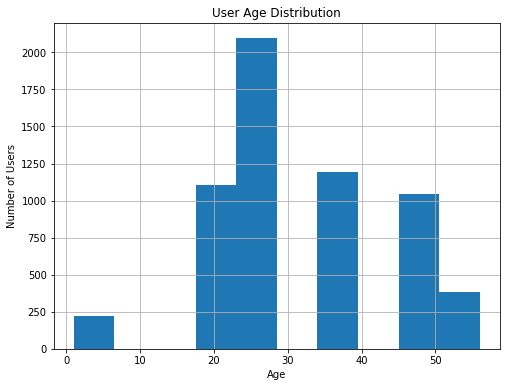

In [13]:
# user age distribution
plt.figure(figsize=(8,6))
users_df.Age.hist()
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

### User rating of the movie “Toy Story”

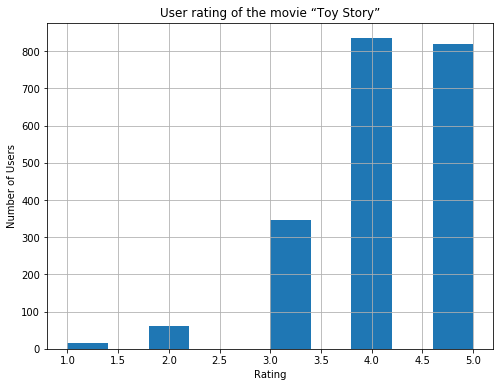

In [14]:
plt.figure(figsize=(8,6))
movies_grouped = movie_ratings_df.groupby('Title')
toy_story = movies_grouped.get_group('Toy Story (1995)')
toy_story['Rating'].hist()
plt.title('User rating of the movie “Toy Story”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()

### Top 25 movies by viewership rating

#### Average ratings of the movies

In [15]:
rating_avg = movie_ratings_df.groupby('Title')['Rating'].mean()
rating_avg.head()

Title
$1,000,000 Duck (1971)           3.027027
'Night Mother (1986)             3.371429
'Til There Was You (1997)        2.692308
'burbs, The (1989)               2.910891
...And Justice for All (1979)    3.713568
Name: Rating, dtype: float64

In [16]:
rating_avg = rating_avg.sort_values(ascending=False)
rating_avg.head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

### Number of ratings for the movies

In [17]:
rating_count = movie_ratings_df.groupby('Title')['Rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [18]:
rating_avg_count = pd.DataFrame(data=rating_avg)
rating_avg_count['number_of_ratings'] = pd.DataFrame(rating_count)
rating_avg_count.head()

,Rating,number_of_ratings
Title,,
"Gate of Heavenly Peace, The (1995)",5.0,3
Lured (1947),5.0,1
Ulysses (Ulisse) (1954),5.0,1
Smashing Time (1967),5.0,2
Follow the Bitch (1998),5.0,1


In [19]:
rating_avg_count.describe()

,Rating,number_of_ratings
count,3706.000000,3706.000000
mean,3.238892,269.889099
std,0.672925,384.047838
min,1.000000,1.000000
25%,2.822705,33.000000
50%,3.331546,123.500000
75%,3.740741,350.000000
max,5.000000,3428.000000


### Top 25 movies by viewership

### Ratings excluding movies with less than 10 ratings

In [20]:
filter_data = rating_avg_count[rating_avg_count['number_of_ratings']>10]
filter_data[:25]

,Rating,number_of_ratings
Title,,
Sanjuro (1962),4.608696,69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510,628
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Close Shave, A (1995)",4.520548,657
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
"Wrong Trousers, The (1993)",4.507937,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470


### The ratings for all the movies reviewed by user ID 2696

In [21]:
user_2696 = movie_ratings_users_df[movie_ratings_users_df['UserID'] == 2696]
user_2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


### Feature Engineering

### The uniques gengres

In [22]:
movie_ratings_df['Genres'].value_counts().head()

Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: Genres, dtype: int64

In [23]:
movie_ratings_df['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

### Genre category with a one-hot encoding ( 1 and 0)

In [24]:
movie_ratings_selected_df = movie_ratings_users_df[[
    'Gender',
    'Age',
    'Occupation',
    'Rating',
    'Genres'
]]

In [25]:
Genre = movie_ratings_selected_df['Genres']
Genre = Genre.str.get_dummies().add_prefix('Genres_')
movie_ratings_genres_df = pd.concat(
    [movie_ratings_selected_df.drop(
        ['Genres'],
        axis=1
    ),
     Genre],
    axis=1,
    
)
movie_ratings_genres_df.head()

,Gender,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,...,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,F,1,10,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,1,10,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
movie_ratings_genres_df = pd.get_dummies(
    movie_ratings_genres_df,
    columns = ['Gender']
)

In [27]:
movie_ratings_genres_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,1,10,5,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,5,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,10,4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
movie_ratings_genres_df.columns

Index(['Age', 'Occupation', 'Rating', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Children's', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

### Features affecting the ratings of any Partcular movie.

In [29]:
movie_ratings_genres_df.dtypes

Age                   int64
Occupation            int64
Rating                int64
Genres_Action         int64
Genres_Adventure      int64
Genres_Animation      int64
Genres_Children's     int64
Genres_Comedy         int64
Genres_Crime          int64
Genres_Documentary    int64
Genres_Drama          int64
Genres_Fantasy        int64
Genres_Film-Noir      int64
Genres_Horror         int64
Genres_Musical        int64
Genres_Mystery        int64
Genres_Romance        int64
Genres_Sci-Fi         int64
Genres_Thriller       int64
Genres_War            int64
Genres_Western        int64
Gender_F              uint8
Gender_M              uint8
dtype: object

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

linReg = LinearRegression(
    copy_X=True,
    fit_intercept=True,
    n_jobs=1,
    normalize=False
)

In [31]:
movie_ratings_users_sample_df = movie_ratings_genres_df.sample(
    n=50000,
    random_state=0
)
movie_ratings_users_sample_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
324271,18,4,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
818637,18,4,3,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
148677,18,14,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
778790,50,7,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
525489,25,2,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
x = movie_ratings_users_sample_df.drop('Rating',axis=1)
y = movie_ratings_users_sample_df['Rating']

In [33]:
x.shape

(50000, 22)

In [34]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [35]:
linear_reg=LinearRegression()

In [36]:
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = linear_reg.predict(x_test)

## Evaluation

In [38]:
print(
    'y-intercept: ',
    linear_reg.intercept_
)
print(
    'Beta coefficients: ',
    linear_reg.coef_
)
print(
    'Mean ABs Error MAE: ',
    metrics.mean_absolute_error(y_test,y_pred)
)
print(
    'Mean Sq Error MSE: ',
    metrics.mean_squared_error(y_test,y_pred)
)
print(
    'Root Mean Sq Error RMSE: ',
   np.sqrt(metrics.mean_squared_error(y_test,y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

y-intercept:  3.3714137555159684
Beta coefficients:  [ 0.00406322  0.00098825 -0.0933231   0.00822898  0.41190314 -0.32536968
 -0.00937548  0.07845926  0.43311855  0.22781148  0.07368389  0.3951835
 -0.29085584  0.12523149  0.02288591  0.00234758 -0.01347635  0.06128953
  0.30880281  0.14777492  0.01440465 -0.01440465]
Mean ABs Error MAE:  0.8978299534841195
Mean Sq Error MSE:  1.1977731707567232
Root Mean Sq Error RMSE:  1.0944282391992282
r2 value:  0.03795269985311833


## Age and Occupation are the main features affecting the ratings for the movies

In [39]:
x_train.dtypes

Age                   int64
Occupation            int64
Genres_Action         int64
Genres_Adventure      int64
Genres_Animation      int64
Genres_Children's     int64
Genres_Comedy         int64
Genres_Crime          int64
Genres_Documentary    int64
Genres_Drama          int64
Genres_Fantasy        int64
Genres_Film-Noir      int64
Genres_Horror         int64
Genres_Musical        int64
Genres_Mystery        int64
Genres_Romance        int64
Genres_Sci-Fi         int64
Genres_Thriller       int64
Genres_War            int64
Genres_Western        int64
Gender_F              uint8
Gender_M              uint8
dtype: object

In [40]:
prediction_df=pd.DataFrame({'Test':y_test,'prediction':y_pred})
prediction_df.head()

,Test,prediction
187446,4,4.322363
69421,4,3.439548
941725,3,3.408593
841836,4,3.652663
869012,4,3.559433
